In [54]:
#imported the libraries
import  tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import zipfile

In [28]:
tf.random.set_seed(42)
print('TensorFlow Version',tf.__version__)

TensorFlow Version 2.19.0


In [29]:
# Download DataSet From Kaggle.com
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
with zipfile.ZipFile('face-mask-dataset.zip','r') as zip_ref:
    zip_ref.extractall(".")

In [31]:
base_dir = 'data'
os.listdir(base_dir)

['with_mask', 'without_mask']

In [32]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [33]:
train_data = datagen.flow_from_directory(
        base_dir,
        target_size=(224,224),
        batch_size=32,
        class_mode='binary',
        subset='training',
        seed=42)

Found 6043 images belonging to 2 classes.


In [34]:
test_data = datagen.flow_from_directory(
        base_dir,
        target_size=(224,224),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        seed=42)

Found 1510 images belonging to 2 classes.


In [35]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3), #used for preventing overfitting
    tf.keras.layers.Dense(1,activation='sigmoid')

])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 106, 106, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,281 (9.90 MB)

 Trainable params: 2,595,281 (9.90 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history=model.fit(train_data,epochs=5,validation_data=test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 91/189 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7499 - loss: 0.5018

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.7927 - loss: 0.4365 - val_accuracy: 0.9146 - val_loss: 0.2312
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8831 - loss: 0.2719 - val_accuracy: 0.9351 - val_loss: 0.1810
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9151 - loss: 0.2017 - val_accuracy: 0.9351 - val_loss: 0.1759
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9321 - loss: 0.1711 - val_accuracy: 0.9490 - val_loss: 0.1482
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9550 - loss: 0.1248 - val_accuracy: 0.9450 - val_loss: 0.1450


In [39]:
#Evaluate
loss,accuracy=model.evaluate(test_data)

print(f"Loss: {loss}")
print(f"Accuray {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9430 - loss: 0.1451
Loss: 0.14498597383499146
Accuray 0.9450331330299377


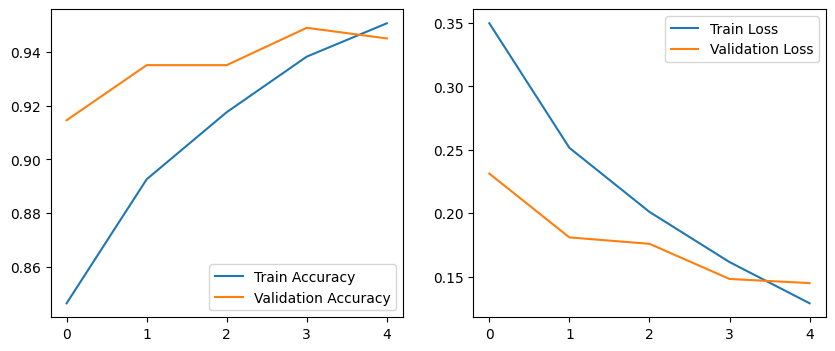

In [40]:
#plot Accuracy and Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


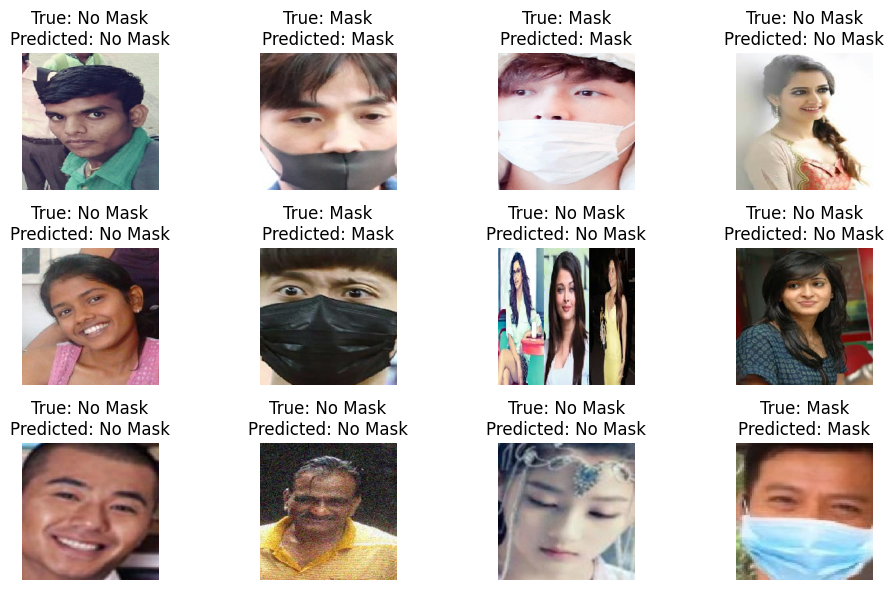

In [56]:
images,labels=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    true_label="Mask" if labels[i]==0 else "No Mask"
    predicted_label="Mask" if predictions[i]<0.5 else "No Mask"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()






Saving jinah.jpg to jinah (2).jpg
File Uploaded :  jinah (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction :  No Mask
Confidence :  94.638466 %


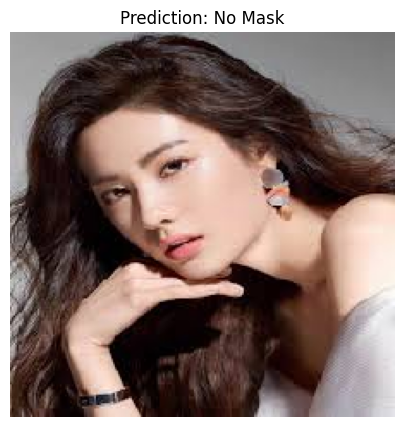

In [58]:
from google.colab import files
uploaded=files.upload()
for fn in  uploaded.keys():
  img_path=fn
  print("File Uploaded : ",img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)/255.0

  pred=model.predict(img_array)[0][0]
  label="Mask " if pred<0.5 else "No Mask"
  print("Prediction : ",label)
  print("Confidence : ",100*(1-pred) if pred<0.5 else 100*pred,"%")

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.title(f"Prediction: {label}")
  plt.axis("off")
  plt.show()